In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv",sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.duplicated(keep=False).sum()

460

In [6]:
df = df.drop_duplicates()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
X = df.iloc[:, :-1]
y = df[["quality"]]
print(X.shape)
print(y.shape)

(1359, 11)
(1359, 1)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(272, 11)
(1087, 11)
(272, 1)
(1087, 1)


In [9]:
from sklearn.preprocessing import OneHotEncoder

catdf = pd.DataFrame(y_train["quality"].unique().tolist(),columns=["quality"])
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(catdf[['quality']]).toarray())
type_one_hot = catdf.join(enc_df).sort_values(by="quality")
type_one_hot_train = y_train.merge(type_one_hot, on="quality")
type_one_hot_test = y_test.merge(type_one_hot, on="quality")
type_one_hot_train

,quality,0,1,2,3,4,5
0,5,0.0,0.0,1.0,0.0,0.0,0.0
1,5,0.0,0.0,1.0,0.0,0.0,0.0
2,5,0.0,0.0,1.0,0.0,0.0,0.0
3,5,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1082,8,0.0,0.0,0.0,0.0,0.0,1.0
1083,8,0.0,0.0,0.0,0.0,0.0,1.0
1084,8,0.0,0.0,0.0,0.0,0.0,1.0
1085,8,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
def normalize_mean(data):
    return (data-data.mean())/data.std()

In [11]:
X_train = normalize_mean(X_train)
X_test = normalize_mean(X_test)
print(X_train)
print(X_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1428      -0.284705          0.589202    -1.393113       -0.455693  -0.338689   
1191      -1.042221          1.919089    -1.393113       -0.151735   1.528404   
461        0.006647          0.453499    -0.251644        0.076234  -0.040749   
1531      -1.275303          0.942029    -0.874264        0.228214  -0.159925   
938       -0.634328         -0.822107     0.578515        0.228214  -0.418140   
...             ...               ...          ...             ...        ...   
661       -0.459517         -0.604982     0.215320       -0.683662  -0.179787   
1533      -0.168164         -0.767826     0.163435       -0.455693  -0.298964   
15         0.356270          0.480640    -0.407299        1.064099   1.607855   
872       -0.576058         -0.984950    -0.147874       -0.379703  -0.438002   
434        1.230327         -0.659263     1.460559        0.532172  -0.259238   

      free sulfur dioxide  

## KNN regression

In [12]:
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2, axis=1)

In [13]:
def knn (x_test, x_train, y_train, k=20):
    neighbors = []
    temp = []

    for i in np.array( x_test):
        distances = euclidean_distance(i,np.array( x_train))

        enumerated_distances = list(enumerate(distances))
        sorted_distances = sorted(enumerated_distances, key=lambda x: x[1])[:k]

        for j in range(k):
            temp.append(sorted_distances[j][0])

        neighbors.append(temp)
        temp = []

    neighbors = np.array(neighbors)
    y_pred = np.array(y_train)[neighbors].sum(axis=1)/k

    return y_pred

In [14]:
y_pred = knn(X_test, X_train, y_train, k=20)
y_pred

array([[5.5 ],
       [5.3 ],
       [5.55],
       [5.8 ],
       [5.4 ],
       [5.35],
       [5.5 ],
       [5.3 ],
       [5.5 ],
       [5.9 ],
       [6.5 ],
       [6.4 ],
       [5.85],
       [5.25],
       [5.45],
       [6.65],
       [5.35],
       [5.15],
       [4.95],
       [6.05],
       [5.5 ],
       [5.1 ],
       [5.35],
       [6.7 ],
       [5.15],
       [6.4 ],
       [5.35],
       [6.65],
       [5.95],
       [5.85],
       [5.4 ],
       [5.4 ],
       [6.45],
       [4.95],
       [5.5 ],
       [6.45],
       [5.95],
       [6.3 ],
       [5.35],
       [5.4 ],
       [5.95],
       [5.7 ],
       [5.9 ],
       [5.75],
       [5.6 ],
       [5.3 ],
       [5.85],
       [5.35],
       [5.4 ],
       [5.3 ],
       [5.35],
       [5.7 ],
       [6.15],
       [6.1 ],
       [5.2 ],
       [5.7 ],
       [5.45],
       [5.85],
       [5.9 ],
       [5.95],
       [6.4 ],
       [5.8 ],
       [5.  ],
       [5.2 ],
       [5.35],
       [5.8 ],
       [5.

In [34]:
def plot_knn(x, y, xlabel, ylabel, tilte):
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(tilte, fontsize=20)
    plt.show()

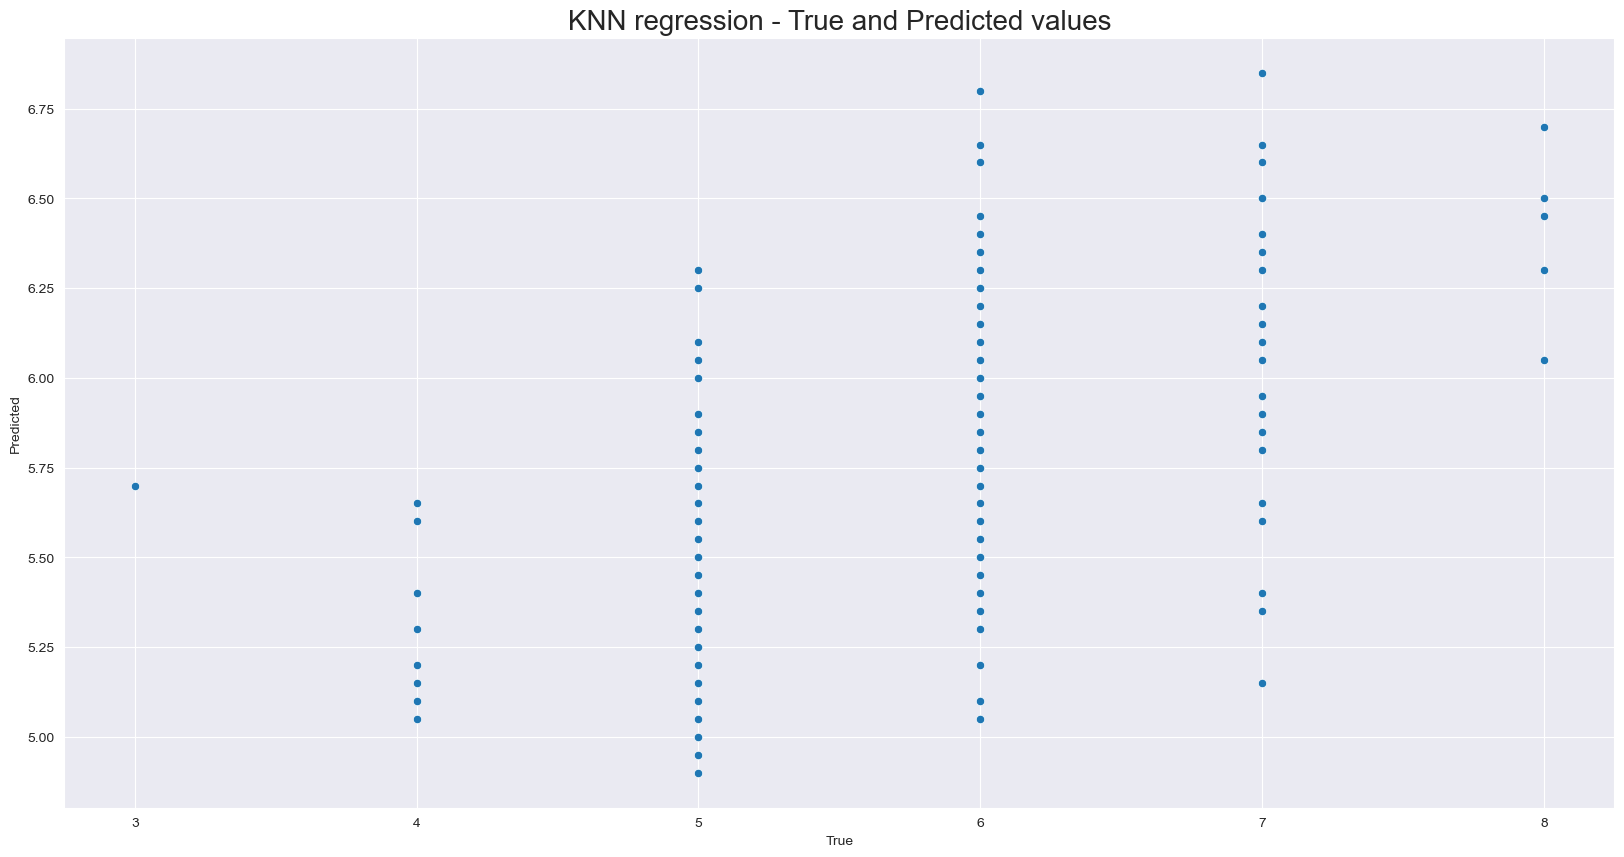

In [40]:
plot_knn(x=y_test["quality"].to_list(), y=y_pred.ravel(),xlabel="True",ylabel="Predicted",tilte="KNN regression - True and Predicted values")

# Weightened KNN

In [43]:
def knn_w(x_test, x_train, y_train, k=20):

    neighbors = []
    weights = []

    for i in np.array(x_test):

        temp = []
        temp_weights = []

        distances = euclidean_distance(i, np.array(x_train))
        enumerated_distances = list(enumerate(distances))
        sorted_distances = sorted(enumerated_distances, key=lambda x: x[1])[:k]

        for j in range(k):
            weight = 1 / sorted_distances[j][1]
            temp.append(sorted_distances[j][0])
            temp_weights.append(weight)

        neighbors.append(temp)
        weights.append(temp_weights)

    neighbors = np.array(neighbors)
    weights = np.array(weights)
    y_pred = np.array(y_train)[neighbors]
    y_pred = ((y_pred * weights).sum(axis=1) / weights.sum(axis=1))

    return y_pred

In [46]:
y_pred_w = knn_w(X_test, X_train, y_train.to_numpy().ravel(), k=20)
y_pred_w

array([5.52256551, 5.26676873, 5.55956384, 5.81226837, 5.35169706,
       5.3473453 , 5.4275191 , 5.31715697, 5.50161195, 5.91874932,
       6.61437222, 6.45075094, 5.856925  , 5.2425114 , 5.41986438,
       6.64885537, 5.35729681, 5.13754285, 4.94424266, 6.04219999,
       5.48001683, 5.09063592, 5.29525388, 6.70990663, 5.12405117,
       6.41722568, 5.3028882 , 6.67197911, 6.00097032, 5.8808621 ,
       5.37890957, 5.35347675, 6.45948339, 4.93622864, 5.55054769,
       6.53566235, 5.96904529, 6.3316512 , 5.32256265, 5.36813798,
       5.94661288, 5.7382916 , 5.9804851 , 5.75695196, 5.55765461,
       5.27310079, 5.83879318, 5.33694825, 5.42715049, 5.31082231,
       5.34384295, 5.5765114 , 6.14214585, 6.1076543 , 5.18633738,
       5.75104058, 5.4531281 , 5.87357501, 5.90890487, 5.94779324,
       6.39259116, 5.78361748, 4.99098451, 5.17500677, 5.34670184,
       5.81789295, 5.46948286, 5.94502073, 5.97953029, 5.21297089,
       5.23321783, 6.10866245, 6.35627906, 6.05495292, 5.38811

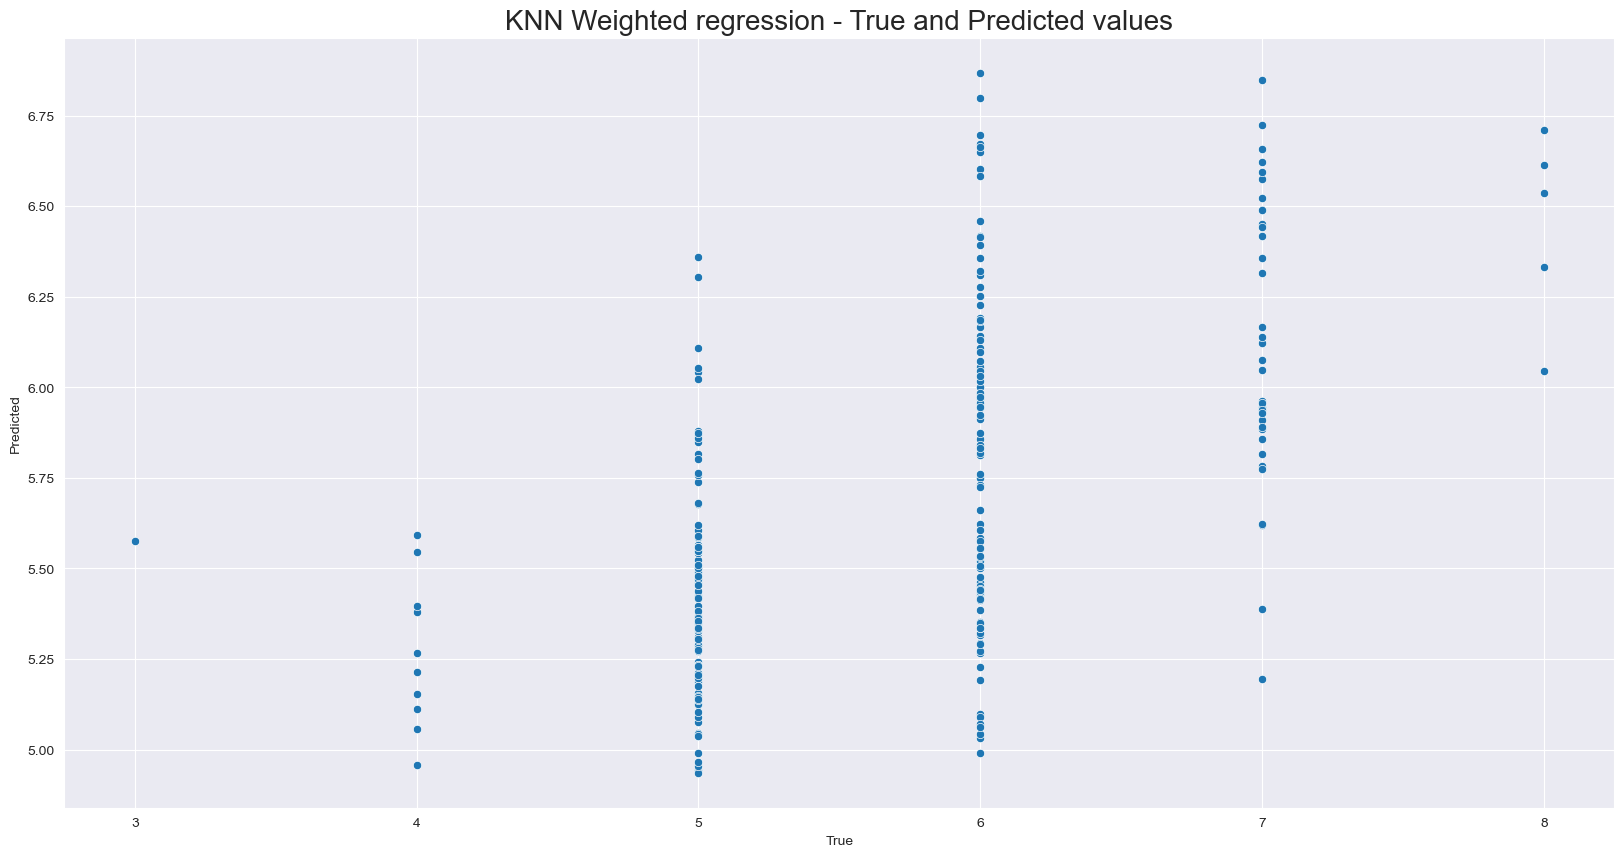

In [49]:
plot_knn(x=y_test.to_numpy().ravel(), y=y_pred_w,xlabel="True",ylabel="Predicted",tilte="KNN Weighted regression - True and Predicted values")

# KNN classification

In [55]:
import operator
def onehot_2_normal(X):
    """
    Convert one-hot encoded matrix to 1D array of label indeces.
    """
    return np.array([np.where(i == 1)[0][0]+3 for i in X])

def knn_class(x_test, x_train, y_train, k=20):

    neighbors = []


    for i in np.array(x_test):
        temp = []
        distances = euclidean_distance(i, np.array(x_train))
        enumerated_distances = list(enumerate(distances))
        sorted_distances = sorted(enumerated_distances, key=lambda x: x[1])[:k]

        for j in range(k):
            temp.append(sorted_distances[j][0])

        neighbors.append(temp)

    neighbors = np.array(neighbors)
    y_values = np.array(y_train)[neighbors]


    y_vals_max = []
    for i in y_values:
        d = {}
        for j in i:
            if tuple(j) in d:
                d[tuple(j)] += 1
            else:
                d[tuple(j)] = 1
        y_vals_max.append(max(d, key=d.get))

    y_vals_max = np.array(y_vals_max)

    y_pred = onehot_2_normal(y_vals_max)

    return y_pred

In [56]:
y_pred_class = knn_class(X_test, X_train, type_one_hot_train, k=20)
y_pred_class

array([7, 6, 7, 6, 6, 7, 6, 7, 6, 6, 7, 7, 6, 6, 6, 6, 6, 7, 6, 7, 7, 7,
       6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 7, 7, 7,
       7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 7, 7, 6, 7, 7, 6, 7, 6, 6, 7, 6,
       6, 6, 7, 6, 6, 6, 7, 7, 7, 6, 6, 7, 7, 6, 6, 7, 7, 6, 6, 7, 6, 6,
       7, 7, 6, 6, 6, 7, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 7, 7,
       7, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 7, 6, 7, 7, 7, 6, 7,
       6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 7, 7, 6,
       6, 7, 7, 7, 7, 6, 6, 6, 6, 7, 6, 6, 7, 7, 7, 6, 6, 6, 6, 7, 7, 6,
       7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 7, 6, 7, 7, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 7, 7, 6, 7, 6,
       6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 7, 7, 6, 7, 7, 7,
       6, 6, 7, 7, 6, 6, 7, 6, 6, 6, 6, 7, 7, 6, 6, 6, 7, 6, 6, 7, 6, 7,
       6, 6, 6, 6, 7, 6, 6, 7], dtype=int64)

In [85]:
def baseline(y_train, x_test):
    y_pred = [(y_train.sum() / len((y_train)))] * len(x_test)
    return np.array(y_pred).ravel()

In [86]:
pred_baseline = baseline(y_train, X_test)
pred_baseline

array([5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085557,
       5.61085557, 5.61085557, 5.61085557, 5.61085557, 5.61085

In [104]:
def compute_accuracy(y_true, y_pred):

    correct_predictions = 0

    for true_val, predicted_val in zip(y_true, y_pred):
        if true_val == int(round(predicted_val)):
            correct_predictions += 1

    accuracy = correct_predictions/len(y_true)

    return accuracy

In [105]:
acc_test = y_test.to_numpy().ravel()
print(type(acc_test),type(y_pred),type(pred_baseline),type(y_pred_w),type(y_pred_class))
print(y_pred.shape,acc_test.shape,y_pred_w.shape,y_pred_class.shape)
acc_baseline = compute_accuracy(acc_test, pred_baseline.ravel())
acc_uni = compute_accuracy(acc_test, y_pred.ravel())
acc_weighted = compute_accuracy(acc_test, y_pred_w.ravel())
acc_class = compute_accuracy(acc_test, y_pred_class.ravel())


print(f'\n Baseline accuracy: {round((acc_baseline*100), 4)} %\
\n Uniform regression accuracy: {round((acc_uni*100), 4)} % \
\n Weighted accuracy {round((acc_weighted*100), 4)} % \
\n Classification accuracy: {round((acc_class*100), 4)} %')

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(272, 1) (272,) (272,) (272,)

 Baseline accuracy: 39.7059 %
 Uniform regression accuracy: 52.5735 % 
 Weighted accuracy 54.7794 % 
 Classification accuracy: 30.5147 %


In [107]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor(n_neighbors=20)
model.fit(X_train, y_train)
pred_sci_uni = model.predict(X_test)

print(f'''
KNN classification:

Built in:
{pred_sci_uni}
My prediction:
{y_pred}
Accuracy built in: {round((compute_accuracy(y_test,pred_sci_uni)*100), 4)} %
Accuracy my prediction: {round((acc_class*100), 4)} %''')


TypeError: type numpy.ndarray doesn't define __round__ method

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt



def knn_regression(x_test, x_train, y_train, k=20):
    rmse_val = [] #to store rmse values for different k
    for K in range(k):
        K = K+1
        model = KNeighborsRegressor(n_neighbors = K)

        model.fit(x_train, y_train)  #fit the model
        y_pred = model.predict(x_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
    #plotting the rmse values against k values
    curve = pd.DataFrame(rmse_val) #elbow curve
    curve.plot()
    return rmse_val

In [ ]:
y_pred = knn_regression(x_test, x_train, y_train, k=20)

In [ ]:

qualitydict = {key:values for key, values in enumerate(catdf['quality'].to_list())}

X =[]
Y =[]

for i,row in y_test.iterrows():
    for index, x in enumerate(row.values.flatten().tolist()):
        if x == 1.0:
            val = qualitydict[index]
            print(val)
            Y.append(val)

for i in y_pred:
    val = qualitydict[max(range(len(i)), key=i.__getitem__)]
    print(val)
    X.append(val)


plt.scatter(X, Y, c ="blue")

# To show the plot
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# knn= KNeighborsRegressor(20, weights="distance")
knn= KNeighborsClassifier(20, weights="uniform")
knn.fit(x_train, y_train)
knn.predict(x_test)